In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
# Create our X and y data
X = bc.data
y = bc.target



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [5]:
from sklearn import datasets
# Load dataset
cancer = datasets.load_breast_cancer()

In [6]:
# Exploring the dataset structure
print(cancer.DESCR)
# Convert to DataFrame for ease of manipulation
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [8]:
# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

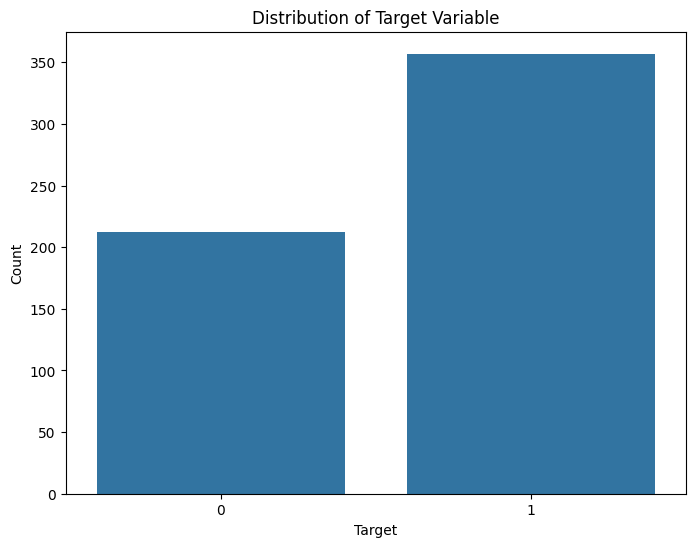

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Basic statistics
print(X.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

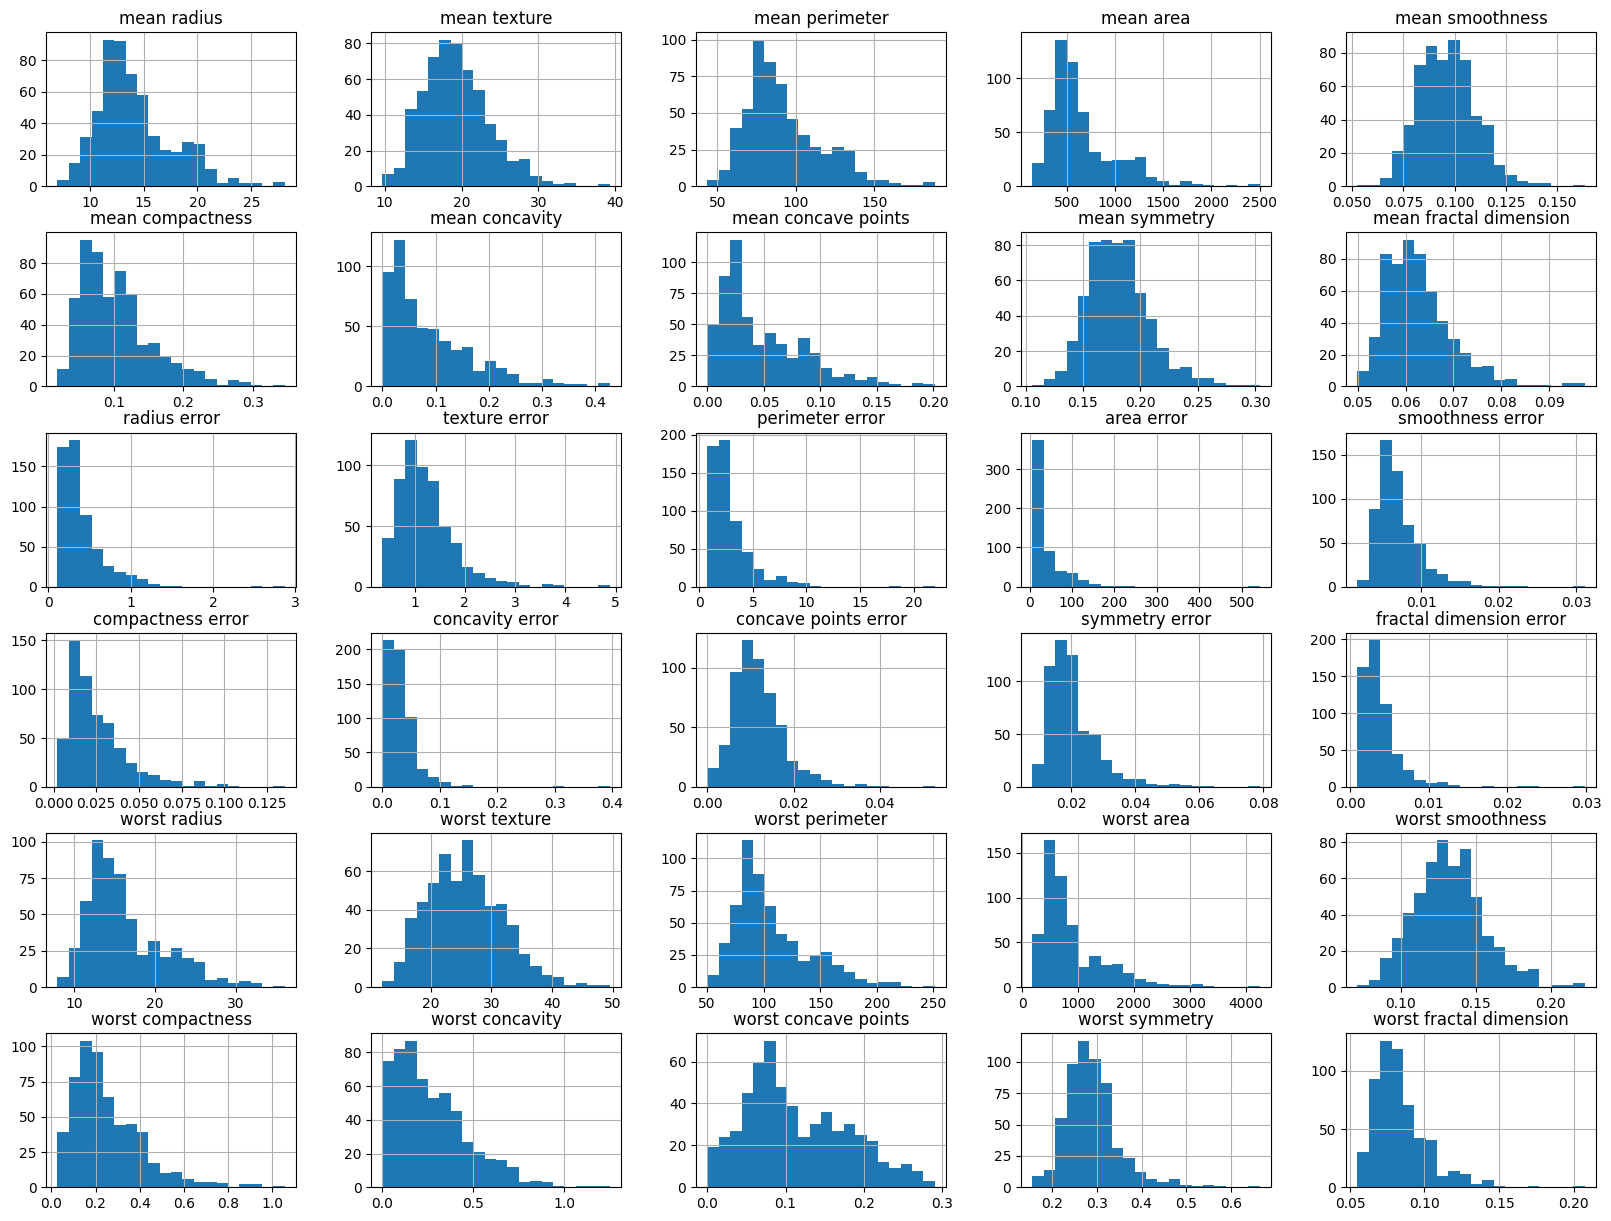

In [15]:
# Histogram for features visualization
X.hist(bins=20,  figsize=(20,  15))
plt.show()

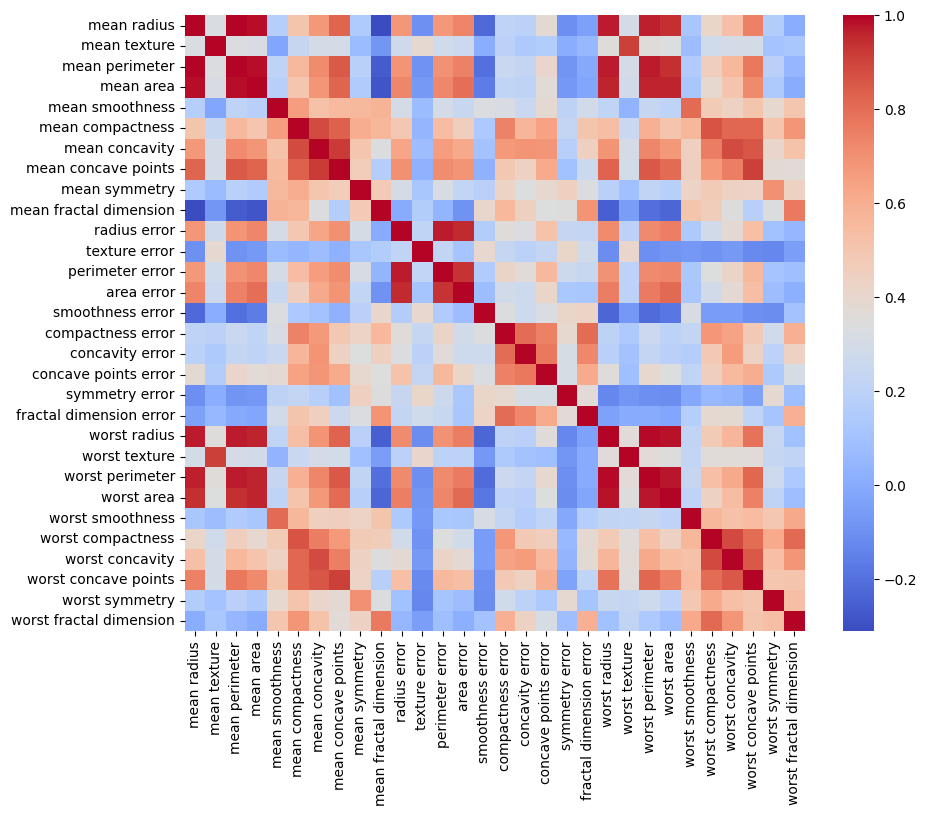

In [17]:
# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


In [18]:
# Initialize the Logistic Regression classifier
logreg = LogisticRegression(random_state=42,  max_iter=10000)

In [19]:
# K-Fold Cross-Validation setup
kf = KFold(n_splits=10,  shuffle=True,  random_state=42)

In [20]:
# Perform cross-validation
cv_scores = cross_val_score(logreg,  X_train_scaled,  y_train,  cv=kf)

In [21]:
# Print average CV score
print(f"Cross-validation average accuracy:  {np.mean(cv_scores):.3f}")

Cross-validation average accuracy:  0.974


In [22]:
# Define a hyperparameter grid to search
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with l1 penalty
}


In [24]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [25]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled,  y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [26]:
# Print the best parameters and the best score
print(f"Best parameters:  {grid_search.best_params_}")
print(f"Best cross-validation score:  {grid_search.best_score_:.3f}")

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score:  0.978


In [30]:
# Retrieve the best model from grid search
best_logreg = grid_search.best_estimator_

In [32]:
# Train it on the whole training dataset
best_logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='liblinear')

In [33]:
# Predict on the test data
y_pred = best_logreg.predict(X_test_scaled)

In [34]:
# Final evaluation
print(classification_report(y_test,  y_pred))
print(f"Test accuracy:  {accuracy_score(y_test,  y_pred):.3f}")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Test accuracy:  0.991


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

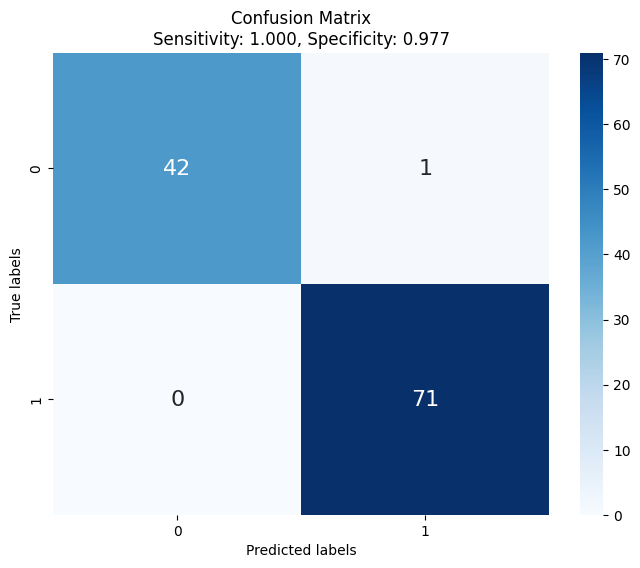

In [53]:
from sklearn.metrics import confusion_matrix

# Assuming you have predictions from your model stored in y_pred
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
# Assuming you have computed the confusion matrix 'conf_matrix' and have true labels 'y_test' and predicted labels 'y_pred'
TN, FP, FN, TP = conf_matrix.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
# Add Sensitivity and Specificity to the title
plt.title(f'Confusion Matrix\nSensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}')
# Add labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()




